In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('fake_bills.csv',delimiter=';')

In [3]:
x = dataset.drop(columns='is_genuine')
y = dataset['is_genuine']


In [4]:
print(y)

0        True
1        True
2        True
3        True
4        True
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: is_genuine, Length: 1500, dtype: bool


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [6]:
print(x_train)

      diagonal  height_left  height_right  margin_low  margin_up  length
519     172.13       103.76        103.33        4.37       3.48  113.34
1032    172.08       104.22        104.41        4.51       3.30  111.40
557     171.24       103.81        103.74        4.69       3.29  113.53
642     171.85       103.90        103.74        4.13       3.07  113.15
651     171.62       103.49        103.58        3.95       3.00  113.10
...        ...          ...           ...         ...        ...     ...
763     172.41       104.43        103.65        3.97       3.35  113.71
835     172.15       104.08        104.10        4.34       2.78  113.33
1216    171.93       104.09        104.51        4.87       3.58  111.63
559     172.12       103.59        103.77        3.74       3.21  113.32
684     172.13       103.76        103.85        3.65       3.24  112.92

[1050 rows x 6 columns]


In [7]:
y_test=y_test.astype(int)
y_train=y_train.astype(int)

In [8]:
total_nan = np.isnan(x_train).sum()
print(f"Total NaN values: {total_nan}")

Total NaN values: diagonal         0
height_left      0
height_right     0
margin_low      26
margin_up        0
length           0
dtype: int64


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


imputer.fit(x_train)

X_train_imputed = imputer.transform(x_train)
X_test_imputed = imputer.transform(x_test)

total_nan_train = np.isnan(X_train_imputed).sum()
total_nan_test = np.isnan(X_test_imputed).sum()

print(f"Total NaN values in X_train after imputation: {total_nan_train}")
print(f"Total NaN values in X_test after imputation: {total_nan_test}")



Total NaN values in X_train after imputation: 0
Total NaN values in X_test after imputation: 0


In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_imputed, y_train)


KNeighborsClassifier()

In [16]:
y_pred=knn.predict(X_test_imputed)

In [18]:
ans=knn.predict([[171,104,104,4,2,112]])
print(ans)

[ True]


In [19]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9977777777777778


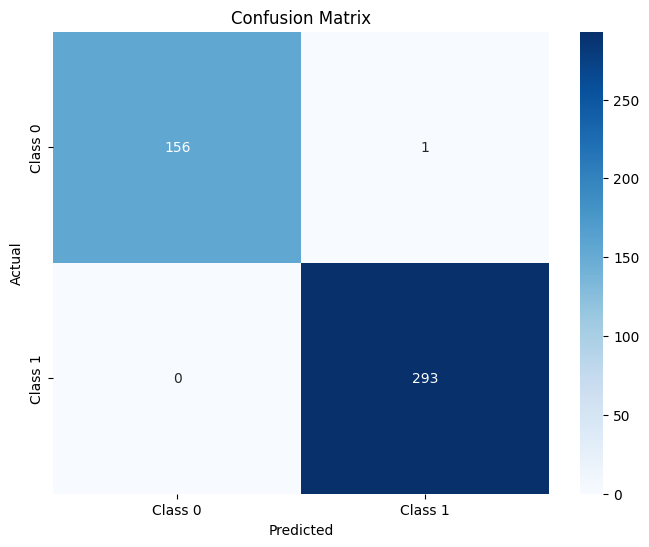

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - SVM')
plt.show()

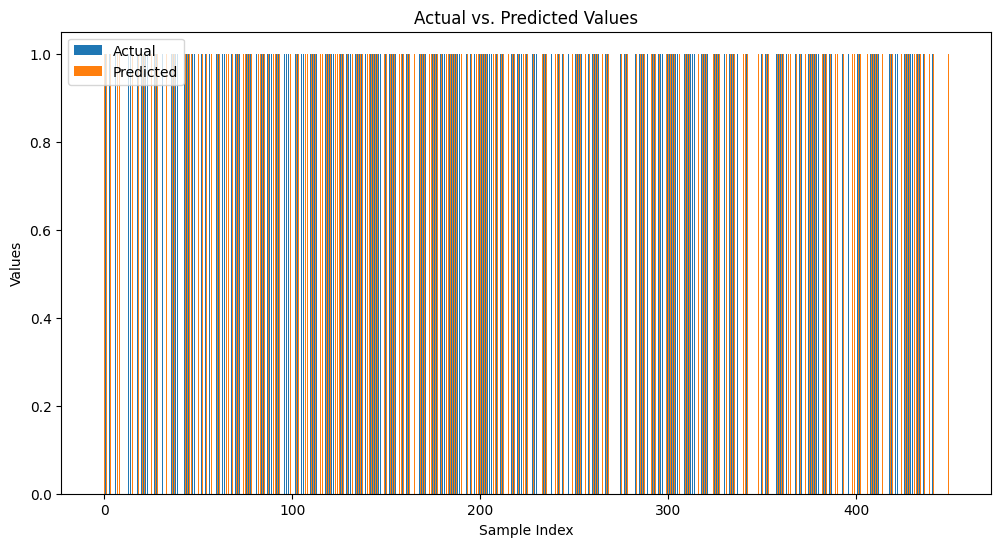

In [21]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.arange(len(y_test))

plt.figure(figsize=(12, 6))
plt.bar(indices - 0.2, y_test, width=0.4, label='Actual', align='center')
plt.bar(indices + 0.2, y_pred, width=0.4, label='Predicted', align='center')

plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


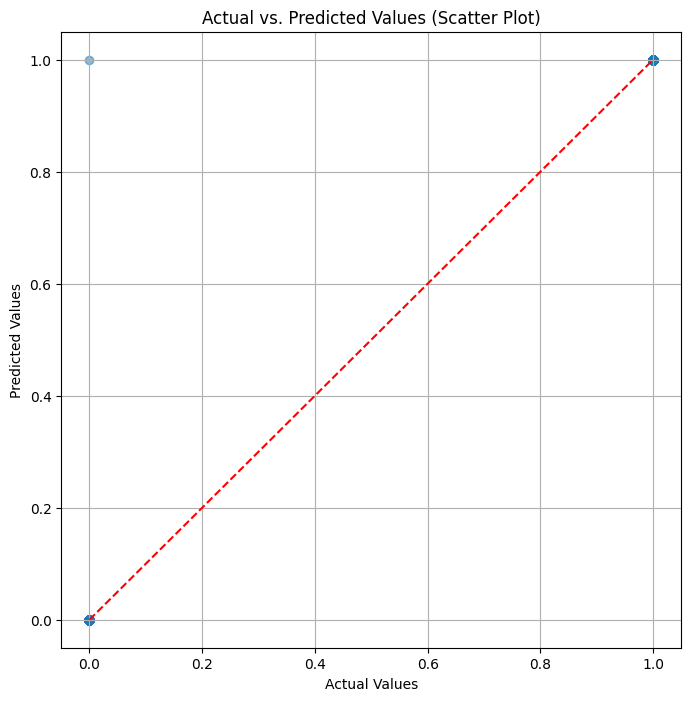

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of equality
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Scatter Plot)')
plt.grid(True)
plt.show()
